In [1]:
# This cell will authenticate you and mount your Drive in the Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Qdrant Vector database**

In [2]:
qdrant_database_location = "/content/drive/MyDrive/W266_Project/qdrant"

In [3]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.7 MB/s eta 0:00:00


In [4]:
from langchain.document_loaders import PyPDFLoader, UnstructuredURLLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [5]:
import pickle

# Load chunks from the file
with open('/content/drive/MyDrive/W266_Project/chunks/chunks.pkl', 'rb') as file:
    loaded_chunks = pickle.load(file)

In [6]:
import importlib
import warnings
import textwrap

warnings.filterwarnings("ignore", category=UserWarning)


def install_if_needed(package_names):
    """
    Install one or more Python packages using pip if they are not already installed.

    Args:
        package_names (str or list): The name(s) of the package(s) to install.

    Returns:
        None
    """
    if isinstance(package_names, str):
        package_names = [package_names]

    for package_name in package_names:
        try:
            importlib.import_module(package_name)
            print(f"{package_name} is already installed.")
        except ImportError:
            !pip install --quiet {package_name}
            print(f"{package_name} has been installed.")


def running_in_colab():
    """
    Check if the Jupyter Notebook is running in Google Colab.

    Returns:
        bool: True if running in Google Colab, False otherwise.
    """
    try:
        import google.colab

        return True
    except ImportError:
        return False

In [7]:
packages = [
    "openai",
    "cohere",
    "tiktoken",
    "transformers",
    "sentence_transformers",
]

install_if_needed(packages)

import openai, tiktoken

import cohere
from langchain.chat_models import ChatOpenAI
from langchain.llms import Cohere

from langchain.embeddings import HuggingFaceEmbeddings
from transformers import AutoTokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.5/221.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
openai has been installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires tiktoke

In [8]:
st_model_name = "multi-qa-mpnet-base-cos-v1"
st_embeddings_model = HuggingFaceEmbeddings(model_name=st_model_name)
st_tokenizer = AutoTokenizer.from_pretrained(f"sentence-transformers/{st_model_name}")

embeddings_model = st_embeddings_model

.gitattributes:   0%|          | 0.00/737 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [9]:
from langchain.chains import RetrievalQA
from langchain import PromptTemplate, LLMChain
from langchain.vectorstores import Qdrant

In [10]:
install_if_needed("qdrant-client")
from langchain.vectorstores import Qdrant

collection_name = "my_collection"
qdrant_database_location = "/content/drive/MyDrive/W266_Project/qdrant"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.25.1 which is incompatible.
qdrant-client has been installed.


In [44]:
loaded_chunks_flat = [item for sublist in loaded_chunks for item in sublist]


In [57]:
qdrant_database_location = "/content/drive/MyDrive/W266_Project/qdrant_1"

In [ ]:
vectordb = Qdrant.from_documents(
    documents = loaded_chunks_flat,
    embedding = embeddings_model,
    # location = ":memory:",
    path = qdrant_database_location,
    collection_name = collection_name
    )

In [12]:
install_if_needed("python-dotenv")

python-dotenv has been installed.


In [13]:
import os
from dotenv import load_dotenv

# Specify the path to the directory containing the .env file
env_file_directory = '/content/drive/MyDrive/W266_Project/environment_file'

# Load environment variables from the .env file in the specified directory
load_dotenv(dotenv_path=os.path.join(env_file_directory, '.env'))

# Access the values
openai_api_key = os.getenv("OPENAI_API_KEY")
cohere_api_key = os.getenv("COHERE_API_KEY")


In [14]:
import os
from dotenv import load_dotenv

# Load environment variables from the .env file
load_dotenv()

# Access the values
openai_api_key = os.getenv("OPENAI_API_KEY")
cohere_api_key = os.getenv("COHERE_API_KEY")


**Setting prompt through Langchain**

In [15]:
# llm = Cohere(model="command", temperature=0)
LLM = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
# llm = ChatOpenAI(model="gpt-4", temperature=0)

In [16]:
# detailed
template = """Use the following pieces of context to answer the question at the end.
Your answer should be as detailed as possible .
If you don't know the answer, just say that you don't know.

{context}

Question: {question}

Answer:"""

prompt = PromptTemplate(template=template, input_variables=["context", "question"])

chain = RetrievalQA.from_chain_type(
    LLM, retriever=vectordb.as_retriever(), chain_type_kwargs={"prompt": prompt})

In [17]:
from langchain import PromptTemplate, LLMChain

**Semantic Similarity to get relevant chunks corresponding to question**

In [59]:
LLM_predictd = pd.read_csv('/content/drive/MyDrive/W266_Project/train_predictedAnswers10.csv')

In [ ]:
import pandas as pd
LLM_predictd ['semantic_similarity'] = None

for index, row in LLM_predictd.iterrows():
  semantic_search = []
  # print(row['question'])
  # train_df['semantic_chunks'] = vectordb.similarity_search(row['question'])
  results = vectordb.similarity_search(row['question'] , 30 )
  print(results)



**Predicting answers from those relevant chunks using question**

In [ ]:
import pandas as pd

train_df_LLM['predicted_answer_1'] = None

for index, row in train_df_LLM.iterrows():
  # semantic_search = []
  # print(row['question'])
  # train_df['semantic_chunks'] = vectordb.similarity_search(row['question'])
  result = chain.run(row['question'])

  train_df_LLM.at[index, 'predicted_answer_1'] = textwrap.fill(result.strip())

In [90]:
import pandas as pd

# Assuming LLM_predictd is your DataFrame
LLM_predictd_2 = LLM_predictd[LLM_predictd['predicted_answer'].notna()]



In [91]:
LLM_predictd_2.shape

(990, 12)

In [67]:
!pip install -q nlp
!pip install -q rouge-score
import nlp
!pip install rouge
import rouge
nlp_rouge = rouge.Rouge()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [92]:
LLM_predictd_3 = LLM_predictd_2.reset_index(drop=True)



In [111]:
import pandas as pd

# Assuming df is your DataFrame and 'answer' is the column
LLM_predictd_3['answers'] = LLM_predictd_3['answers'].str.replace(r"[\[\]']", '')


<ipython-input-111-efd7a1a6d0a2>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  LLM_predictd_3['answers'] = LLM_predictd_3['answers'].str.replace(r"[\[\]']", '')


In [113]:
import pandas as pd

# Assuming df is your DataFrame and 'answer' is the column
LLM_predictd_3['answers'] = LLM_predictd_3['answers'].str.replace('"', '')


In [118]:
LLM_predictd_3['answers'] = LLM_predictd_3['answers'].str.replace('\n', ' ')


In [125]:
type(LLM_predictd_3['predicted_answer'].iloc[0])

str

**Evaluation - Rouge Score & Cosine similarity**

In [166]:
from rouge import Rouge
import pandas as pd

# Assuming train_df is your DataFrame
LLM_predictd_3['rouge_score'] = None

rouge = Rouge()

for index, row in LLM_predictd_3[0:423].iterrows():
    predicted_answer = row['predicted_answer']
    ground_truth_answer = row['answers']

    if not predicted_answer:
        continue

    # Calculate Rouge scores
    scores = rouge.get_scores(predicted_answer, ground_truth_answer)
    # print("scores",index, scores)

    # Extract the desired Rouge scores (e.g., Rouge-1 F1 score)
    rouge_1_f1 = scores[0]['rouge-1']['f']


    rouge_l_r = scores[0]['rouge-l']['r']

    # Assign the Rouge score to the 'rouge_score' column in the DataFrame
    LLM_predictd_3.at[index, 'rouge_score'] = rouge_1_f1
    LLM_predictd_3.at[index, 'rouge_score_recall'] = rouge_l_r

In [154]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming train_df is your DataFrame
LLM_predictd_3['cosine_similarity'] = None

rouge = Rouge()

for index, row in LLM_predictd_3[0:423].iterrows():
    predicted_answer = row['predicted_answer']
    ground_truth_answer = row['answers']

    if not predicted_answer:
        continue

    # Calculate Rouge scores
    scores = rouge.get_scores(predicted_answer, ground_truth_answer)

    # Extract the desired Rouge scores
    rouge_1_f1 = scores[0]['rouge-1']['f']
    rouge_l_r = scores[0]['rouge-l']['r']

    # Calculate cosine similarity
    # Calculate cosine similarity between 'target' and 'prediction'
    vectorizer = CountVectorizer().fit([row['answers'], predicted_answer])
    X = vectorizer.transform([row['answers'], predicted_answer])
    cosine_similarity_score = cosine_similarity(X)[0, 1]
    LLM_predictd_3.at[index, 'cosine_similarity_score'] = cosine_similarity_score

    # Assign the scores to the DataFrame
    LLM_predictd_3.at[index, 'rouge_score'] = rouge_1_f1
    LLM_predictd_3.at[index, 'rouge_score_recall'] = rouge_l_r

In [156]:
LLM_predictd_3 = LLM_predictd_3.drop(['answer_category', 'cosine_similarity'], axis=1)


In [141]:
max(LLM_predictd_3['rouge_score_recall'])

0.6153846153846154

In [143]:
# Assuming 'answers' is the column containing the answers in LLM_predictd_3
LLM_predictd_3['answer_length'] = LLM_predictd_3['answers'].apply(lambda x: len(str(x)))


In [144]:
LLM_predictd_3.columns

Index(['id', 'question', 'wiki', 'wiki_link', 'context', 'answers',
       'semantic_similarity', 'semantic_similarity_3', 'semantic_similarity_4',
       'semantic_similarity_5', 'semantic_similarity_1', 'predicted_answer',
       'rouge_score', 'rouge_score_recall', 'answer_length'],
      dtype='object')

In [146]:
# Assuming 'answers' is the column containing the answers in LLM_predictd_3
LLM_predictd_3['question_complexity'] = LLM_predictd_3['answers'].apply(lambda x: 'simple' if len(str(x)) < 100 else 'complex')


In [163]:

LLM_predictd_3['predicted_answer_length'] = LLM_predictd_3['predicted_answer'].apply(lambda x: len(str(x)))

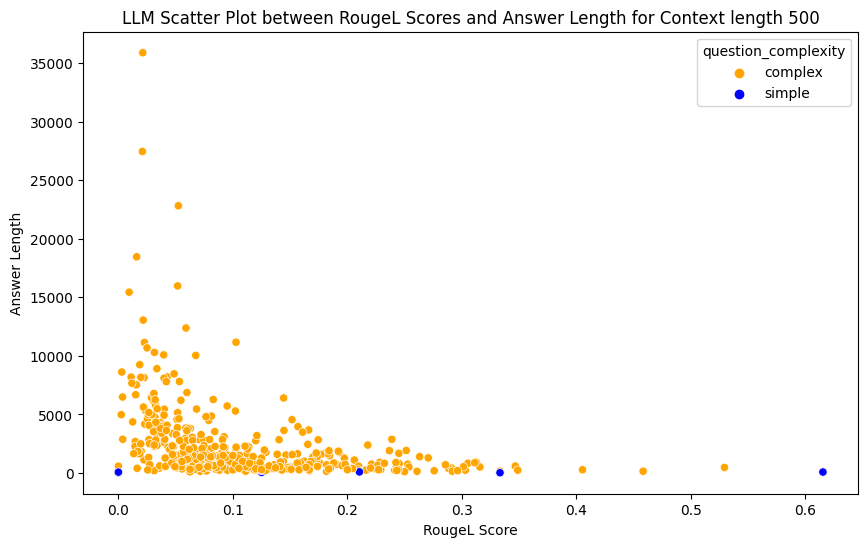

In [151]:
# Very good graph
# T5 Scatter Plot between RougeL Scores and Answer length for Context length 250

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming test_df_new already contains the 'rougeL_scores' and 'gold_answer_length' columns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rouge_score_recall', y='answer_length', data=LLM_predictd_3[0:423], hue='question_complexity', palette={'simple': 'blue', 'complex': 'orange'})
plt.title('LLM Scatter Plot between RougeL Scores and Answer Length for Context length 500')
plt.xlabel('RougeL Score')
plt.ylabel('Answer Length')

# Show the plot
plt.show()

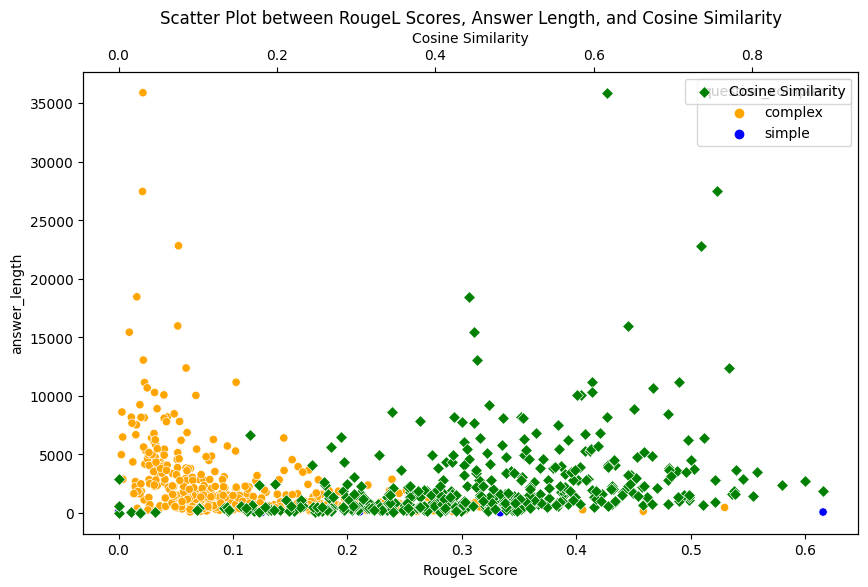

In [160]:
## Very Important Graph
# T5 RougeL score (circles) & Cosine Similarity (circles) with Answer Length on different scales

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming test_df_new already contains the 'rougeL_scores', 'gold_answer_length', and 'cosine_similarity_score' columns

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plot for RougeL scores and answer length
sns.scatterplot(x='rouge_score_recall', y='answer_length', data=LLM_predictd_3[0:423], hue='question_complexity', palette={'simple': 'blue', 'complex': 'orange'}, ax=ax1)

# Create a secondary x-axis for cosine similarity
ax2 = ax1.twiny()
sns.scatterplot(x='cosine_similarity_score', y='answer_length', data=LLM_predictd_3[0:423], color='green', marker='D', label='Cosine Similarity', ax=ax2)

# Set labels for the axes
ax1.set_xlabel('RougeL Score')
ax2.set_xlabel('Cosine Similarity')

# Show the plot
plt.title('Scatter Plot between RougeL Scores, Answer Length, and Cosine Similarity')
plt.ylabel('Values')
plt.legend()
plt.show()


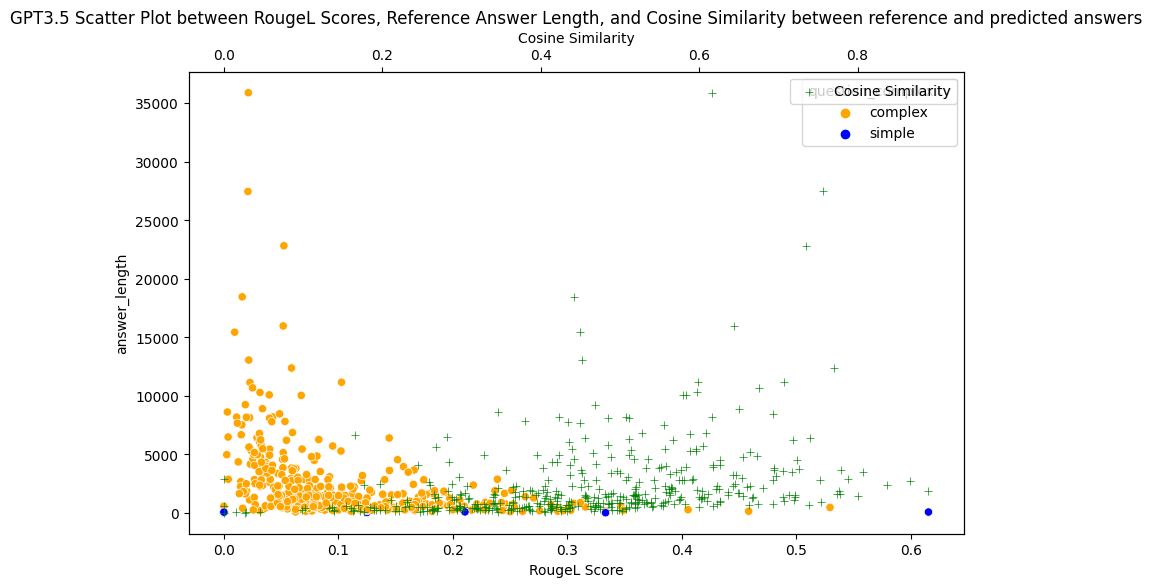

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming LLM_predictd_3 already contains the 'rouge_score_recall', 'answer_length', and 'cosine_similarity' columns

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plot for RougeL scores and answer length
sns.scatterplot(x='rouge_score_recall', y='answer_length', data=LLM_predictd_3[0:423], hue='question_complexity', palette={'simple': 'blue', 'complex': 'orange'}, ax=ax1)

# Create a secondary x-axis for cosine similarity
ax2 = ax1.twiny()
sns.scatterplot(x='cosine_similarity_score', y='answer_length', data=LLM_predictd_3[0:423], color='green', marker='+', label='Cosine Similarity', ax=ax2)

# Set labels for the axes
ax1.set_xlabel('RougeL Score')
ax2.set_xlabel('Cosine Similarity')

# Show the plot
plt.title('GPT3.5 Scatter Plot between RougeL Scores, Reference Answer Length, and Cosine Similarity between reference and predicted answers')
plt.ylabel('Values')
plt.legend()
plt.show()


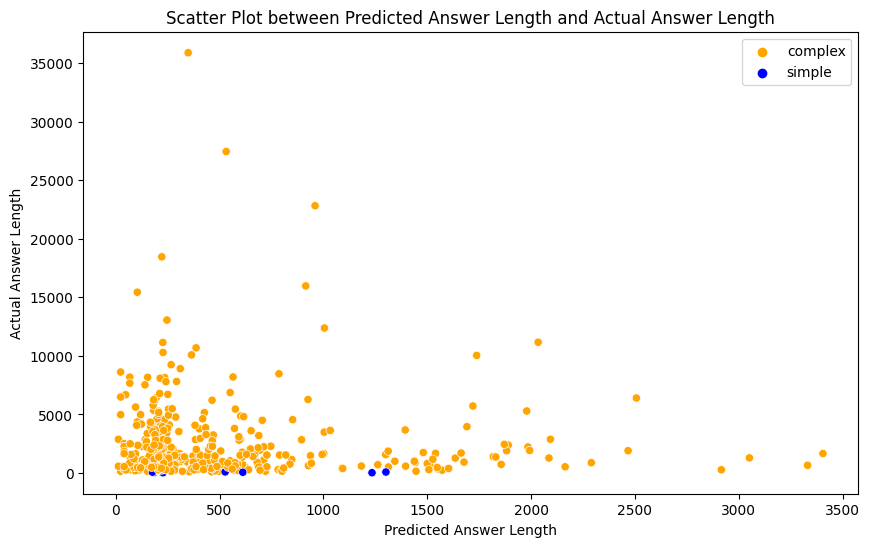

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming LLM_predictd_3 already contains the 'predicted_answer_length' and 'answer_length' columns

# Create a scatter plot between predicted answer length and actual answer length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='predicted_answer_length', y='answer_length', data=LLM_predictd_3[0:423], hue='question_complexity', palette={'simple': 'blue', 'complex': 'orange'})

# Set labels for the axes
plt.xlabel('Predicted Answer Length')
plt.ylabel('Actual Answer Length')

# Show the plot
plt.title('Scatter Plot between Predicted Answer Length and Actual Answer Length')
plt.legend()
plt.show()


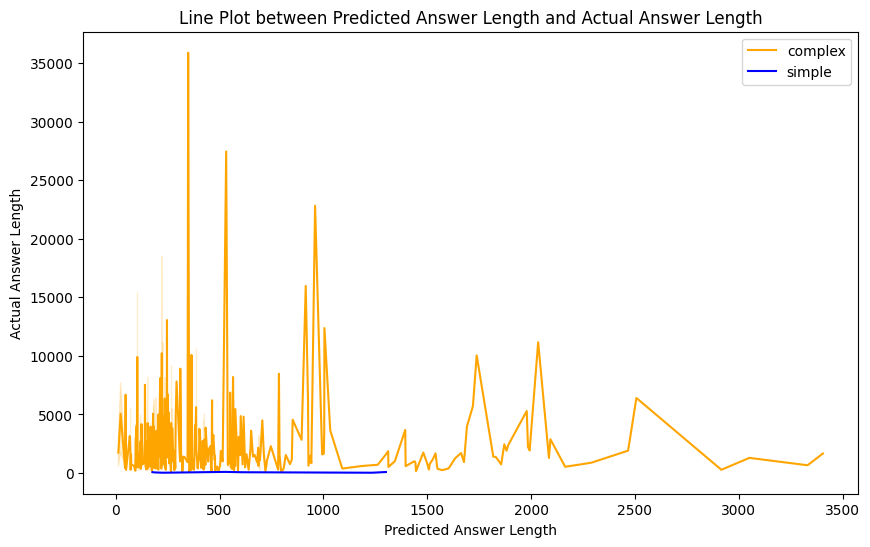

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming LLM_predictd_3 already contains the 'predicted_answer_length' and 'answer_length' columns

# Create a line plot between predicted answer length and actual answer length
plt.figure(figsize=(10, 6))
sns.lineplot(x='predicted_answer_length', y='answer_length', data=LLM_predictd_3[0:423], hue='question_complexity', palette={'simple': 'blue', 'complex': 'orange'})

# Set labels for the axes
plt.xlabel('Predicted Answer Length')
plt.ylabel('Actual Answer Length')

# Show the plot
plt.title('Line Plot between Predicted Answer Length and Actual Answer Length')
plt.legend()
plt.show()


In [132]:
LLM_predictd_3['answers'][0:13]

0      First, I don\t think we can say for certain t...
1      Theyre very similar and legally, there can be...
2      Theyre probably a combination of human voices...
3      I mentioned this in a similar thread but ther...
4      Other types of venomous snakes, cobras, coral...
5      AFAIK we currently do not dig that deep and s...
6      This question is much younger than you might ...
7      That didnt happen.  There was more ice at bot...
8      Dialectics is the practice of holding a discu...
9                              Can you give an example?
10     Somewhat related, human children can actually...
11     Never. The average European peasant was, to t...
12     Related, what about the beers of Augustiner  ...
Name: answers, dtype: object

**Few Shot + COT**

In [219]:
# detailed
# question = "Roger has 5 tennis balls. He buys 2 more cans of tennis balls. Each can have 3 tennis balls. How many tennis balls does he have now?."
# context = "Roger started with 5 balls. 2 cans of 3 tennis balls each is 6 tennis balls. 5+6 = 11. "
question = "A juggler can juggle 16 balls. Half of the balls are golf balls, and half of the golf balls are blue . How many blue golf balls are there?"


template = """
question = "Roger has 5 tennis balls. He buys 2 more cans of tennis balls. Each can have 3 tennis balls. How many tennis balls does he have now?."
context = "Roger started with 5 balls. 2 cans of 3 tennis balls each is 6 tennis balls. 5+6 = 11. "


{context}

Question: {question}

Answer:"""


prompt_FewShotCot = PromptTemplate(template=template, input_variables=["context", "question"])

chain_FewShotCot  = RetrievalQA.from_chain_type(
    LLM, retriever=vectordb.as_retriever(), chain_type_kwargs={"prompt": prompt_FewShotCot })

In [220]:
result_FewShotCot = chain_FewShotCot.run(question)
result_FewShotCot

'There are 8 blue golf balls.'

**Few Shot**

In [224]:
# Good one

question = "A juggler can juggle 16 balls. Half of the balls are golf balls, and half of the golf balls are blue . How many blue golf balls are there?"


template = """

question = "Roger has 5 tennis balls. He buys 2 more cans of tennis balls. Each can have 3 tennis balls. How many tennis balls does he have now?."
context = "Answer is 11"

{context}

Question: {question}

Answer:"""


prompt_FewShot = PromptTemplate(template=template, input_variables=["context", "question"])

chain_FewShot  = RetrievalQA.from_chain_type(
    LLM, retriever=vectordb.as_retriever(), chain_type_kwargs={"prompt": prompt_FewShot })

In [218]:
result_FewShot = chain_FewShot.run(question)
result_FewShot

'There are 8 blue golf balls.'

**Zero Shot**

In [204]:
# # Good one
question = "A juggler can juggle 16 balls. Half of the balls are golf balls, and half of the golf balls are blue . How many blue golf balls are there?"

template = """

{context}

Question: {question}

Answer:"""


prompt_ZeroShot = PromptTemplate(template=template, input_variables=["context", "question"])

chain_ZeroShot = RetrievalQA.from_chain_type(
    LLM, retriever=vectordb.as_retriever(), chain_type_kwargs={"prompt": prompt_ZeroShot})

In [205]:
result_ZeroShot = chain_ZeroShot.run(question)
result_ZeroShot

'There are 4 blue golf balls.'

**`*Zero Shot + Chain of thought*`**

In [213]:
# # Good one
question = "Roger has 5 tennis balls. He buys 2 more cans of tennis balls. Each can have 3 tennis balls. How many tennis balls does he have now?."



template = """ Let's think step by step.

{context}

Question: {question}

Answer:"""


prompt_ZeroShotCot = PromptTemplate(template=template, input_variables=["context", "question"])

chain_ZeroShotCot = RetrievalQA.from_chain_type(
    LLM, retriever=vectordb.as_retriever(), chain_type_kwargs={"prompt": prompt_ZeroShotCot})

In [207]:
result_ZeroShotCot = chain_ZeroShotCot.run(question)
result_ZeroShotCot

'To find the total number of tennis balls Roger has now, we need to add the number of tennis balls he already had (5) to the number of tennis balls he bought (2 cans x 3 balls per can = 6). \n\nSo, Roger now has a total of 5 + 6 = 11 tennis balls.'

**Loss Curves**

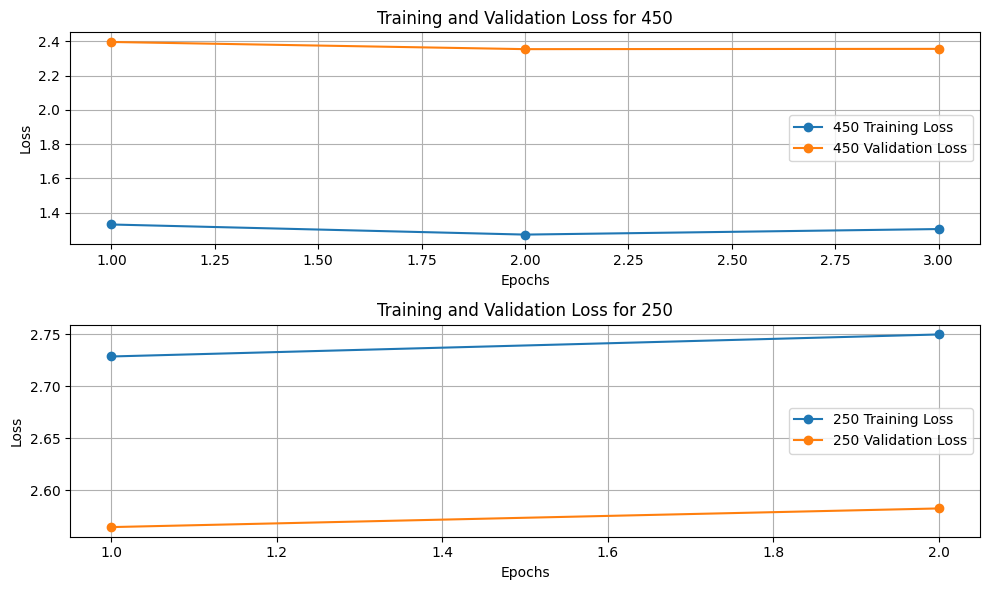

In [225]:
import matplotlib.pyplot as plt

# Data for epoch 1, epoch 2, and epoch 3
epochs = [1, 2, 3]

# 450 training and validation loss
loss_450_train = [1.33100, 1.272100, 1.304400]
loss_450_val = [2.396083, 2.354202, 2.355813]

# 250 training and validation loss
loss_250_train = [2.728700, 2.749900]
loss_250_val = [2.564395, 2.582355]

# Plotting
plt.figure(figsize=(10, 6))

# 450 training and validation loss
plt.subplot(2, 1, 1)
plt.plot(epochs, loss_450_train, marker='o', label='450 Training Loss')
plt.plot(epochs, loss_450_val, marker='o', label='450 Validation Loss')
plt.title('Training and Validation Loss for 450')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 250 training and validation loss
plt.subplot(2, 1, 2)
plt.plot(epochs[:len(loss_250_train)], loss_250_train, marker='o', label='250 Training Loss')
plt.plot(epochs[:len(loss_250_val)], loss_250_val, marker='o', label='250 Validation Loss')
plt.title('Training and Validation Loss for 250')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


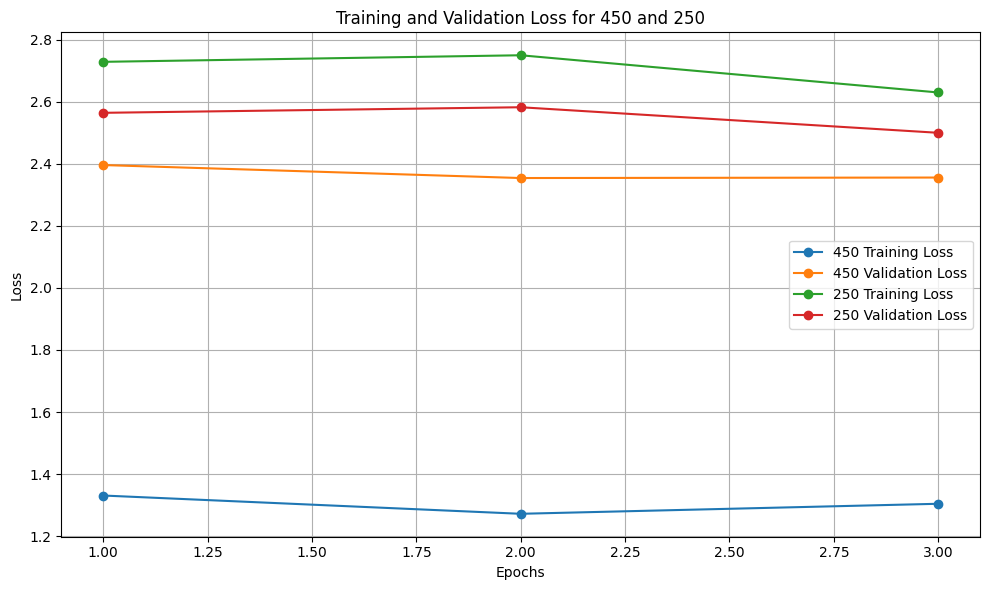

In [228]:
import matplotlib.pyplot as plt

# Data for epoch 1, epoch 2, and epoch 3
epochs = [1, 2, 3]

# 450 training and validation loss
loss_450_train = [1.33100, 1.272100, 1.304400]
loss_450_val = [2.396083, 2.354202, 2.355813]

# 250 training and validation loss
loss_250_train = [2.728700, 2.749900, 2.63]
loss_250_val = [2.564395, 2.582355, 2.5]

# Plotting
plt.figure(figsize=(10, 6))

# Plotting both 450 and 250 on the same graph
plt.plot(epochs, loss_450_train, marker='o', label='450 Training Loss')
plt.plot(epochs, loss_450_val, marker='o', label='450 Validation Loss')
plt.plot(epochs[:len(loss_250_train)], loss_250_train, marker='o', label='250 Training Loss')
plt.plot(epochs[:len(loss_250_val)], loss_250_val, marker='o', label='250 Validation Loss')

plt.title('Training and Validation Loss for 450 and 250')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


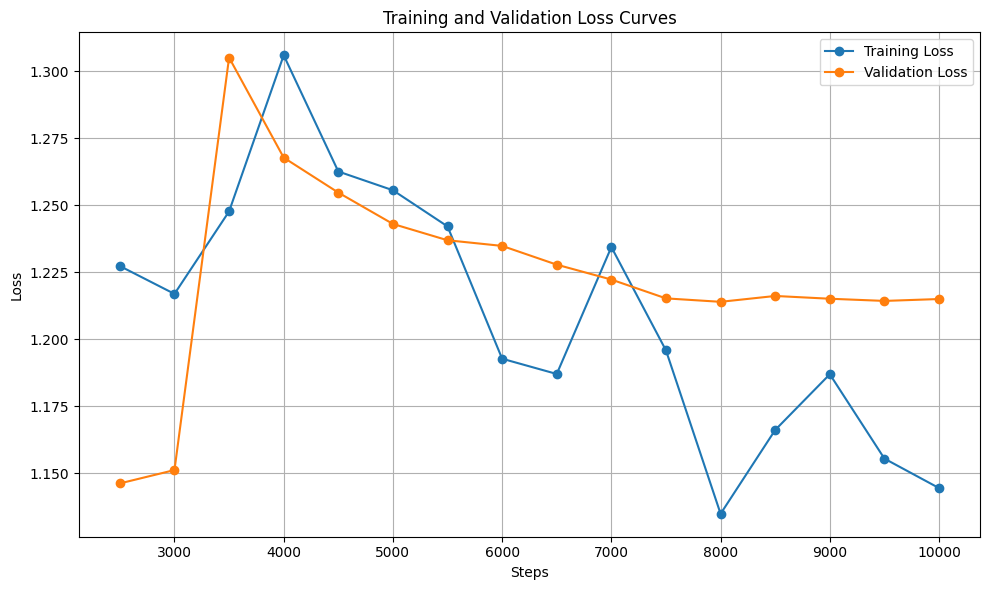

In [227]:
import matplotlib.pyplot as plt

# Data
steps = [2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
training_loss = [1.227300, 1.216900, 1.247700, 1.306000, 1.262600, 1.255600, 1.242100, 1.192700, 1.187000, 1.234400, 1.195800, 1.134800, 1.166100, 1.186900, 1.155400, 1.144400]
validation_loss = [1.146147, 1.151126, 1.305137, 1.267782, 1.254725, 1.243019, 1.236928, 1.234820, 1.227817, 1.222251, 1.215229, 1.213944, 1.216130, 1.215095, 1.214281, 1.214986]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(steps, training_loss, marker='o', label='Training Loss')
plt.plot(steps, validation_loss, marker='o', label='Validation Loss')

plt.title('Training and Validation Loss Curves')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


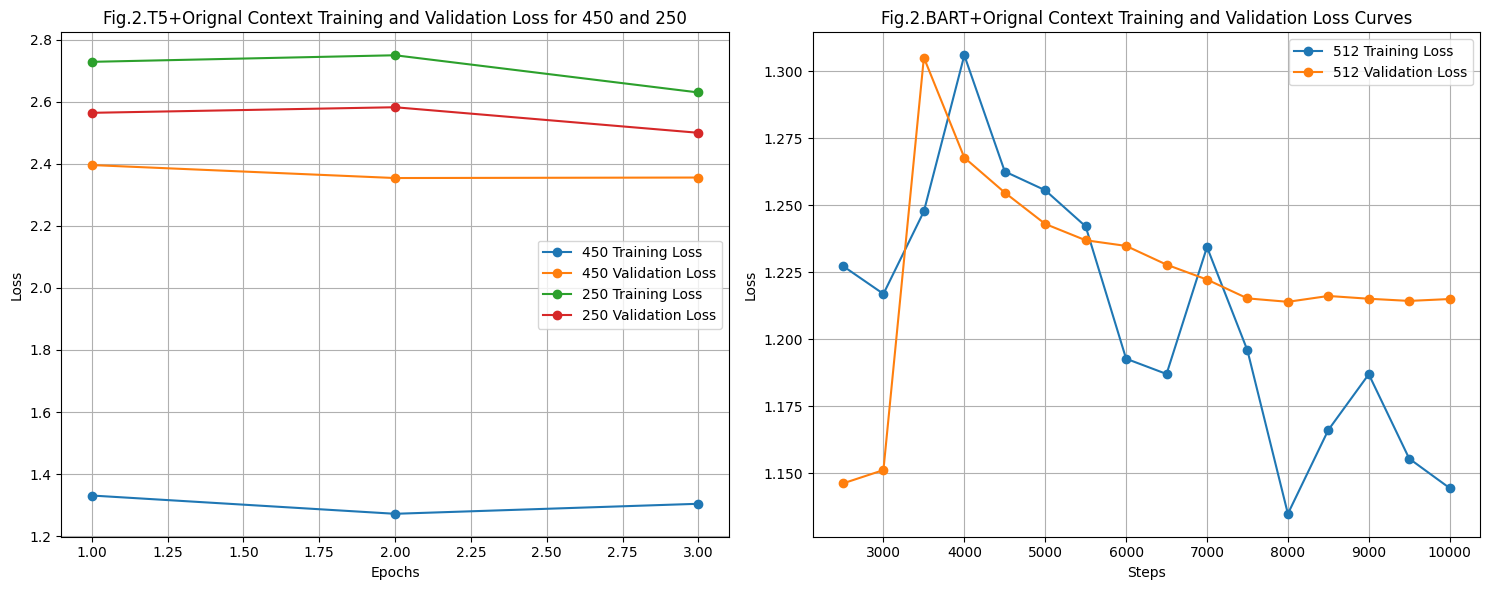

In [234]:
import matplotlib.pyplot as plt

# Data for epoch 1, epoch 2, and epoch 3 for 450 and 250
epochs = [1, 2, 3]

# 450 training and validation loss
loss_450_train = [1.33100, 1.272100, 1.304400]
loss_450_val = [2.396083, 2.354202, 2.355813]

# 250 training and validation loss
loss_250_train = [2.728700, 2.749900, 2.63]
loss_250_val = [2.564395, 2.582355, 2.5]

# Data for steps and training/validation loss
steps = [2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
training_loss = [1.227300, 1.216900, 1.247700, 1.306000, 1.262600, 1.255600, 1.242100, 1.192700, 1.187000, 1.234400, 1.195800, 1.134800, 1.166100, 1.186900, 1.155400, 1.144400]
validation_loss = [1.146147, 1.151126, 1.305137, 1.267782, 1.254725, 1.243019, 1.236928, 1.234820, 1.227817, 1.222251, 1.215229, 1.213944, 1.216130, 1.215095, 1.214281, 1.214986]

# Plotting
plt.figure(figsize=(15, 6))

# Plotting for 450 and 250
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_450_train, marker='o', label='450 Training Loss')
plt.plot(epochs, loss_450_val, marker='o', label='450 Validation Loss')
plt.plot(epochs[:len(loss_250_train)], loss_250_train, marker='o', label='250 Training Loss')
plt.plot(epochs[:len(loss_250_val)], loss_250_val, marker='o', label='250 Validation Loss')

plt.title('Fig.2.T5+Orignal Context Training and Validation Loss for 450 and 250')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting for steps and training/validation loss
plt.subplot(1, 2, 2)
plt.plot(steps, training_loss, marker='o', label='512 Training Loss')
plt.plot(steps, validation_loss, marker='o', label='512 Validation Loss')

plt.title('Fig.2.BART+Orignal Context Training and Validation Loss Curves')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
